# Bank Marketing Analysis for Term Deposit Subscription

The data is related to direct marketing campaigns (phone calls) of a banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required in order to determine if the bank term deposit would be ('yes') or not ('no') subscribed.

The data set has 20 predictor variables (features), 1 target variable (feature) and 41188 rows.

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay

In [2]:
#create data drame to read data set
df = pd.read_csv('data/bank-additional-full.csv', sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Exploratory Data Analysis - EDA

In [3]:
# check the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
# find number of rows and column
df.shape

(41188, 21)

In [5]:
# check for missing values
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [6]:
# describe df numerical columns
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
# Exploring Categorical Features
categorical_features=[feature for feature in df.columns if ((df[feature].dtypes=='O'))]
categorical_features

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [8]:
# unique values in categorical columns
for col in df.select_dtypes(include='object').columns:
    print(col)
    print(df[col].unique())

job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital
['married' 'single' 'divorced' 'unknown']
education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default
['no' 'unknown' 'yes']
housing
['no' 'yes' 'unknown']
loan
['no' 'yes' 'unknown']
contact
['telephone' 'cellular']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']
poutcome
['nonexistent' 'failure' 'success']
y
['no' 'yes']


In [9]:
# printing the feature with the number of categories they have
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df[feature].unique())))

The feature is job and number of categories are 12
The feature is marital and number of categories are 4
The feature is education and number of categories are 8
The feature is default and number of categories are 3
The feature is housing and number of categories are 3
The feature is loan and number of categories are 3
The feature is contact and number of categories are 2
The feature is month and number of categories are 10
The feature is day_of_week and number of categories are 5
The feature is poutcome and number of categories are 3
The feature is y and number of categories are 2


- There are 11 categorical features in the target feature.
- The feature **job** has the highest number of categorical values (12) followed by **month** (10) and **education** (8).

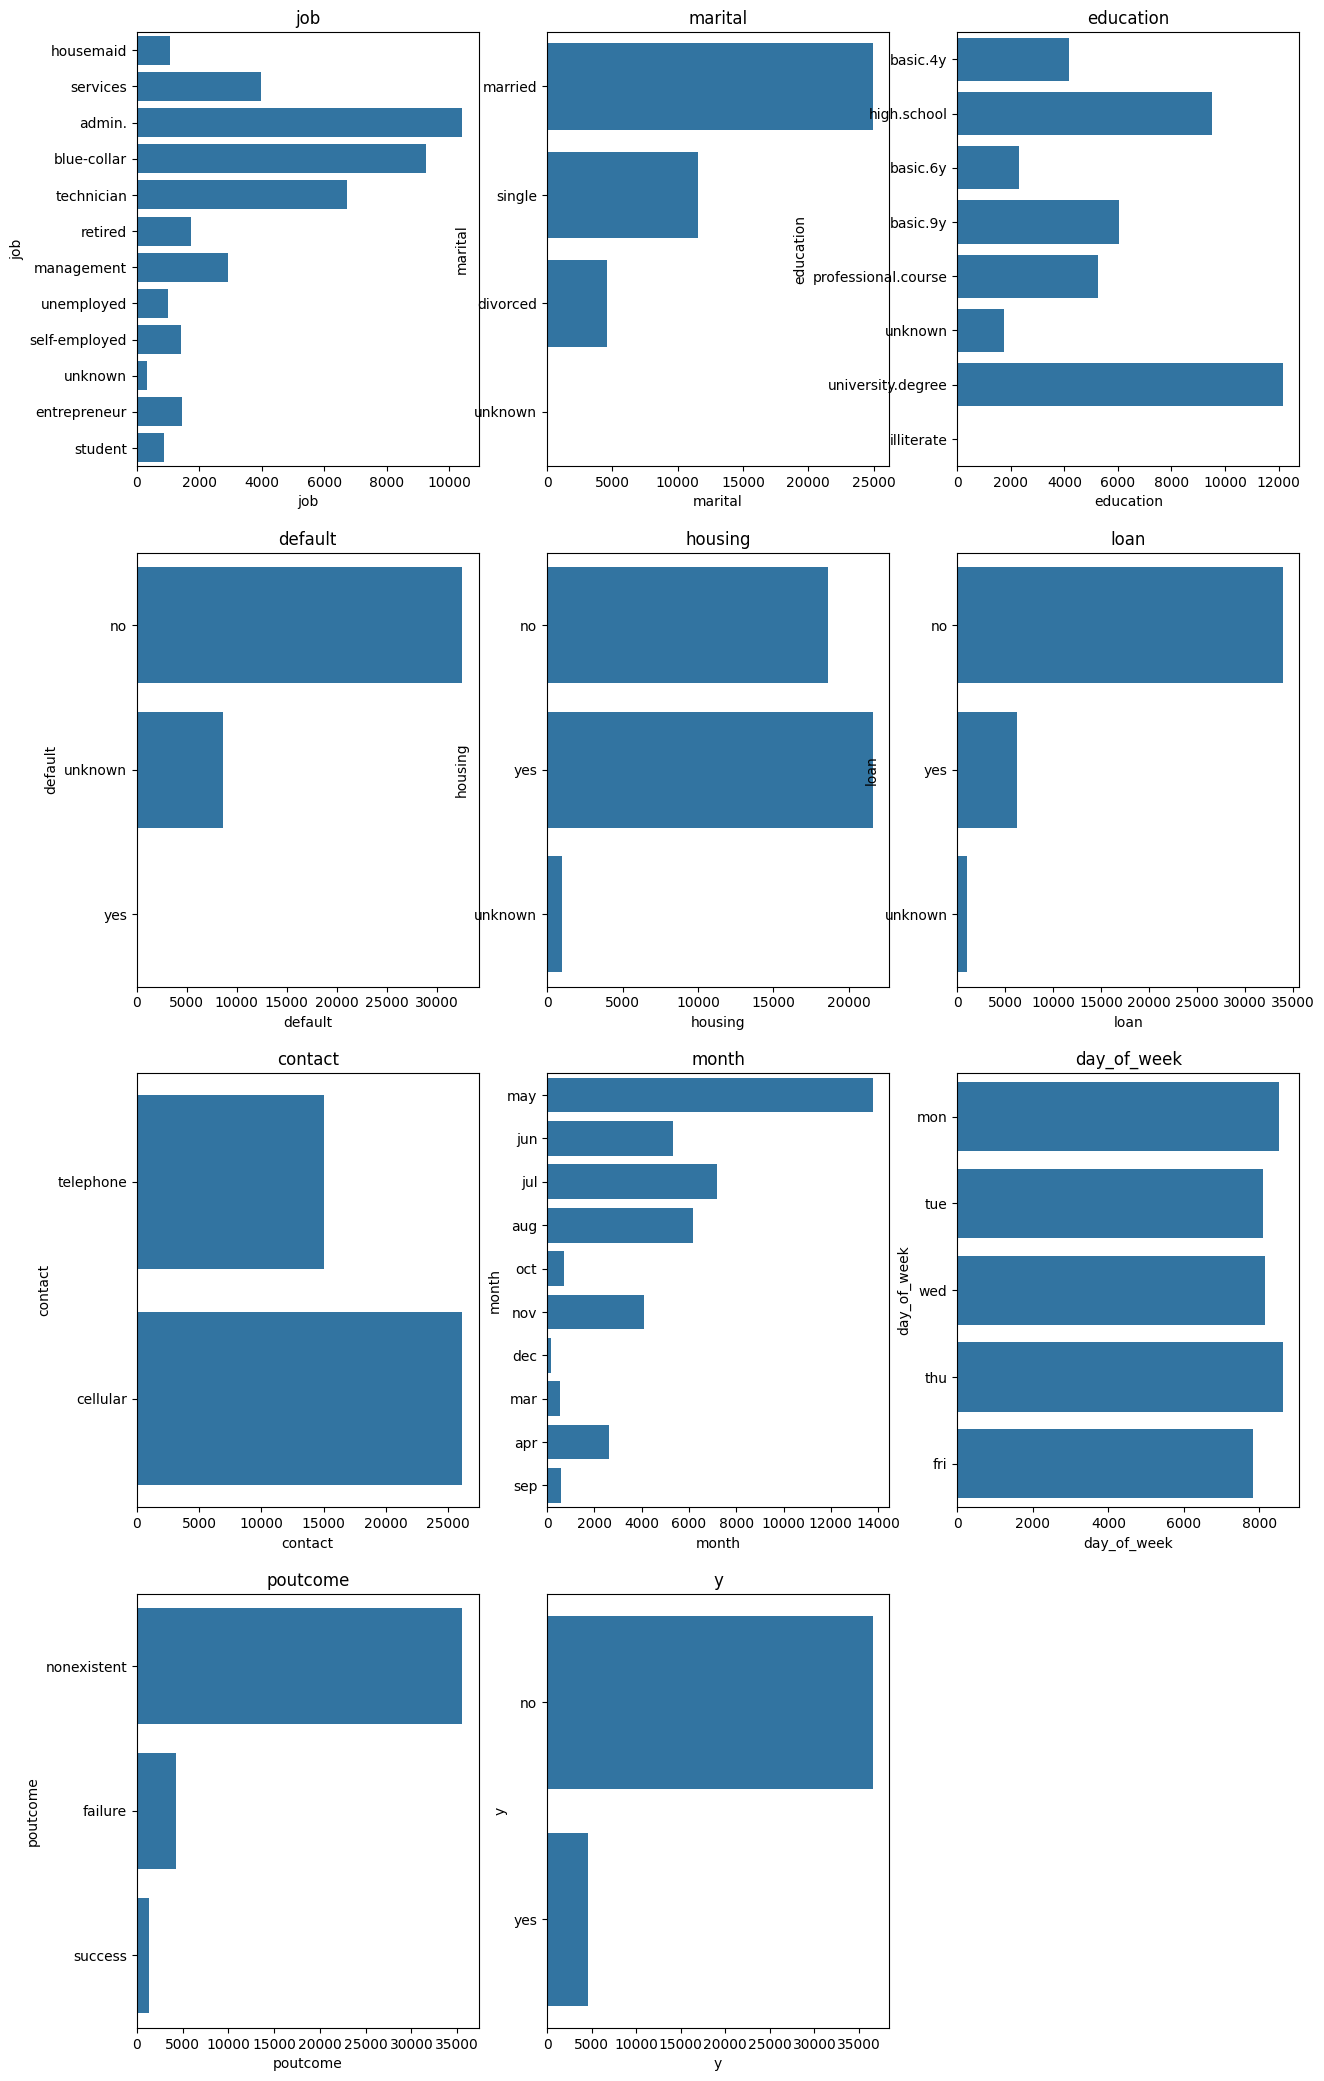

In [10]:
# Distribution of Categorical Feature
plt.figure(figsize=(15,80), facecolor='white')
plotnumber = 1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=df)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber +=1
plt.show()

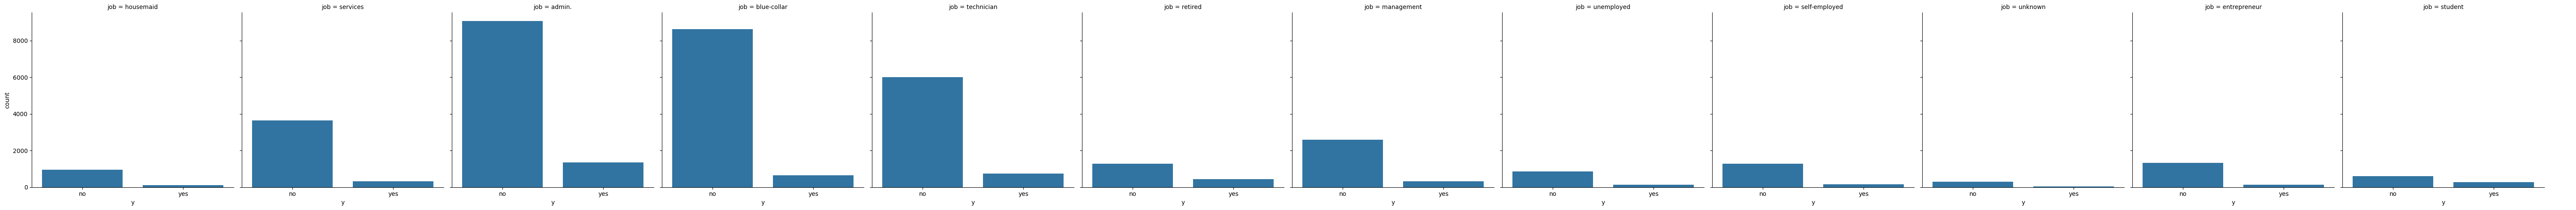

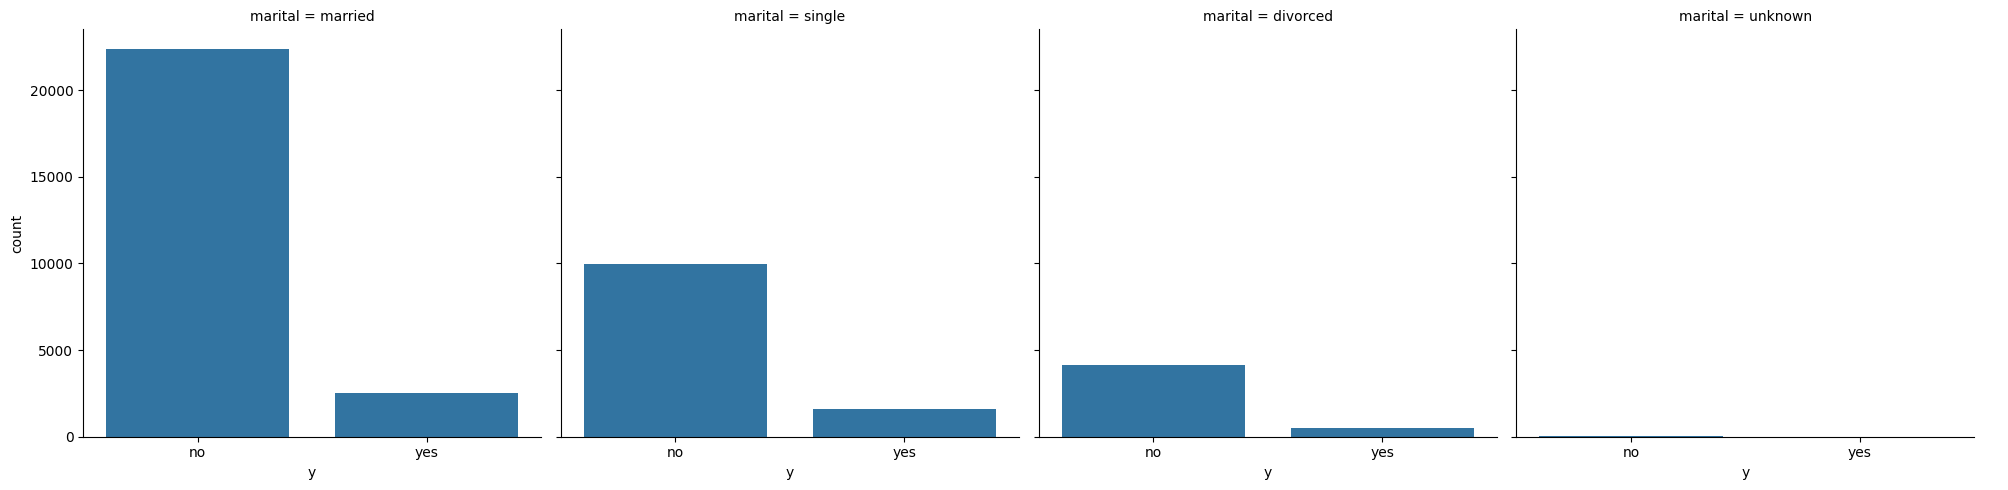

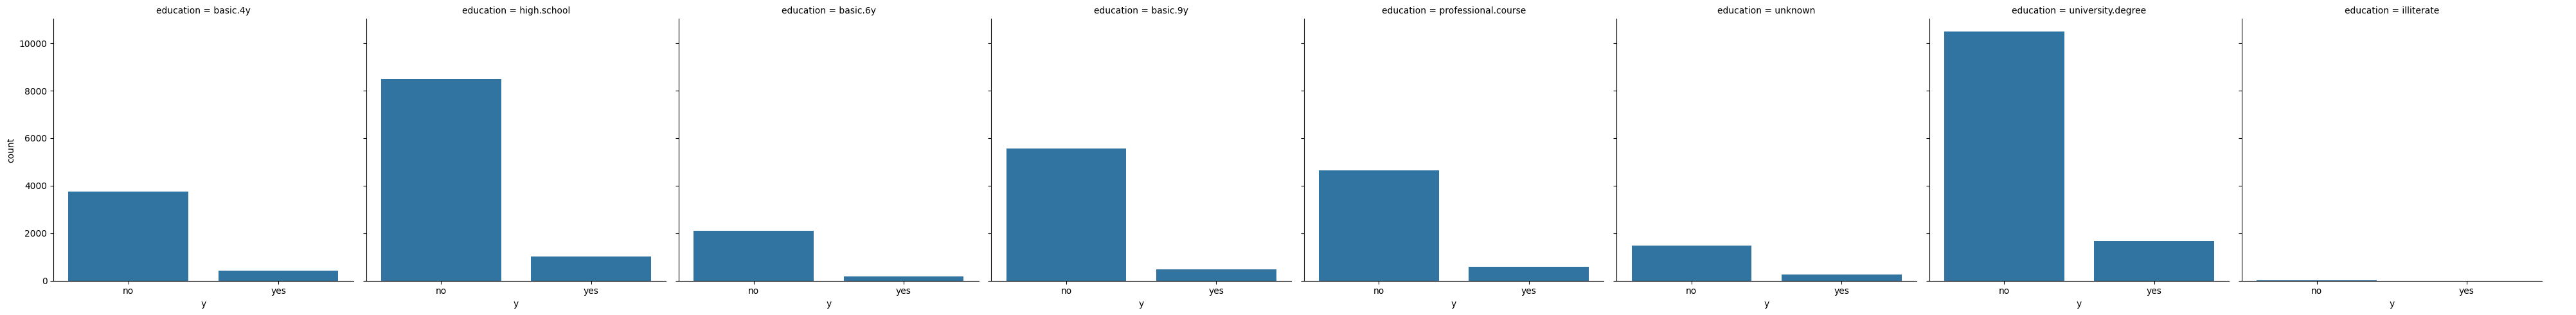

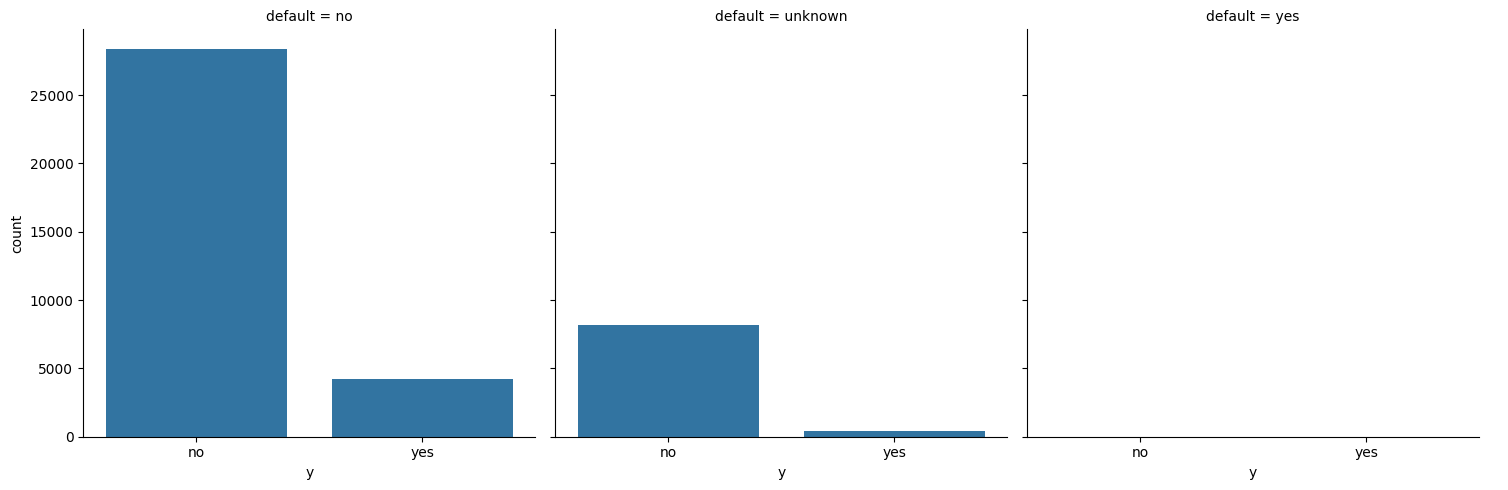

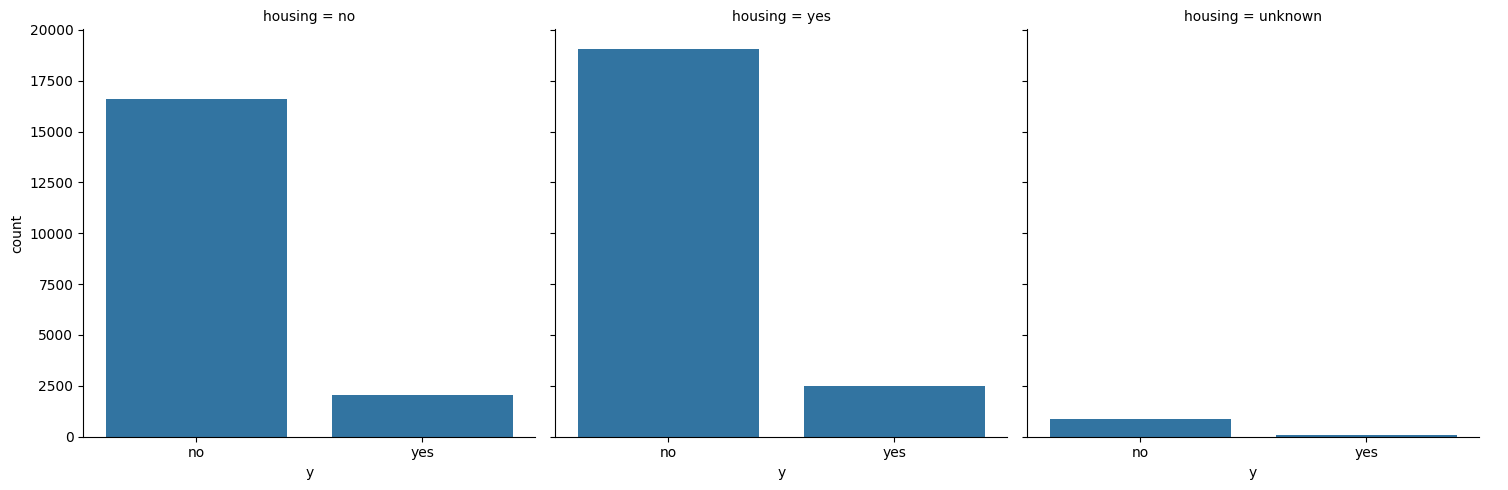

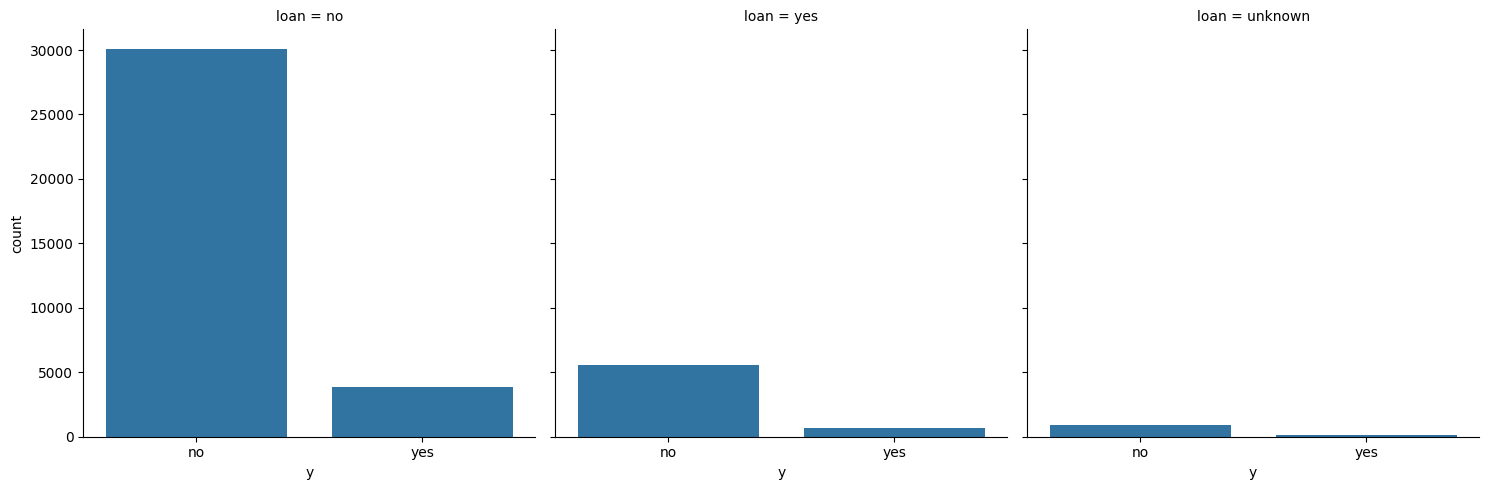

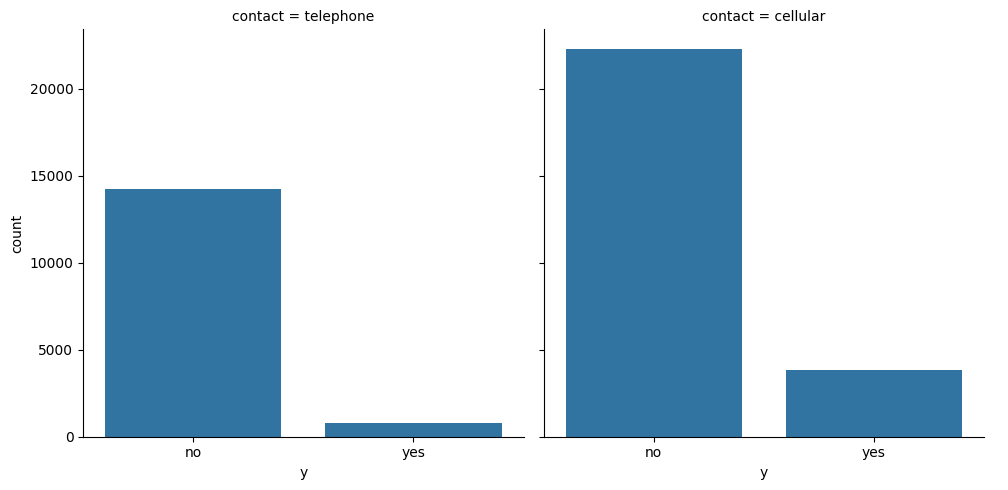

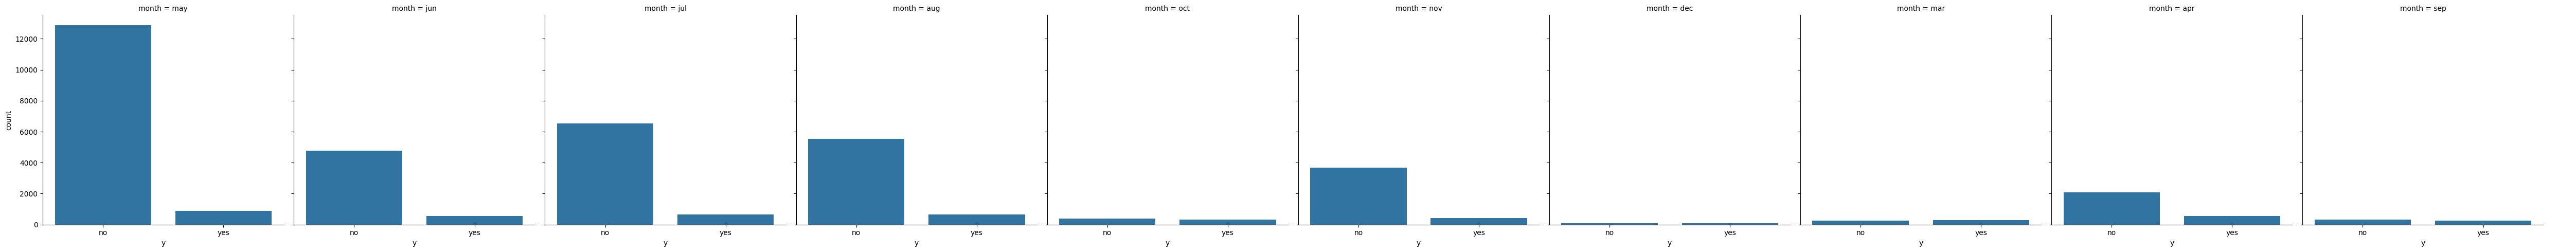

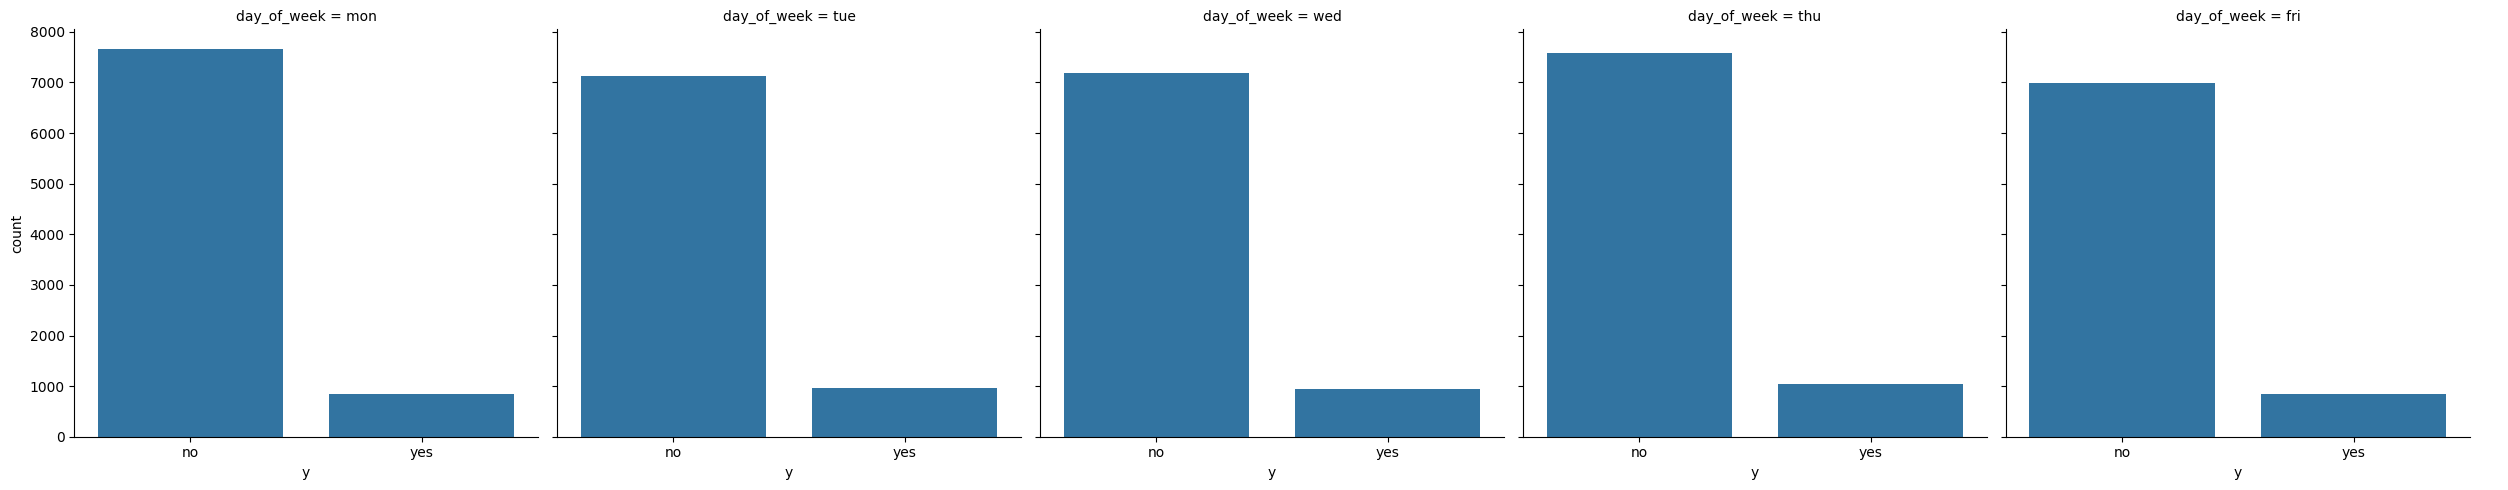

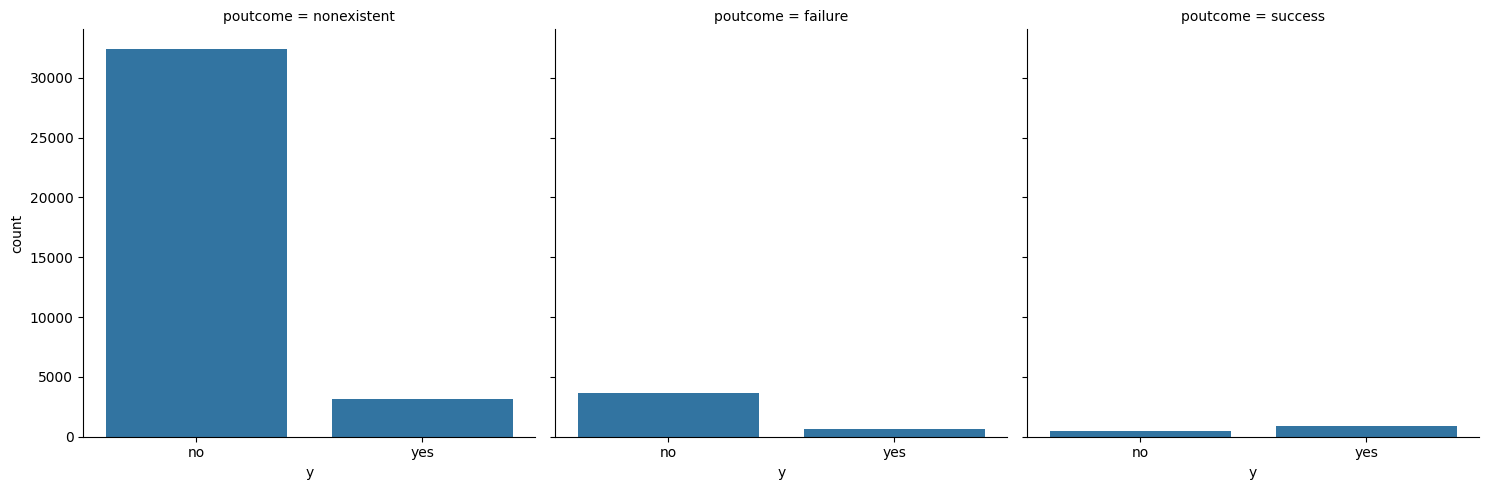

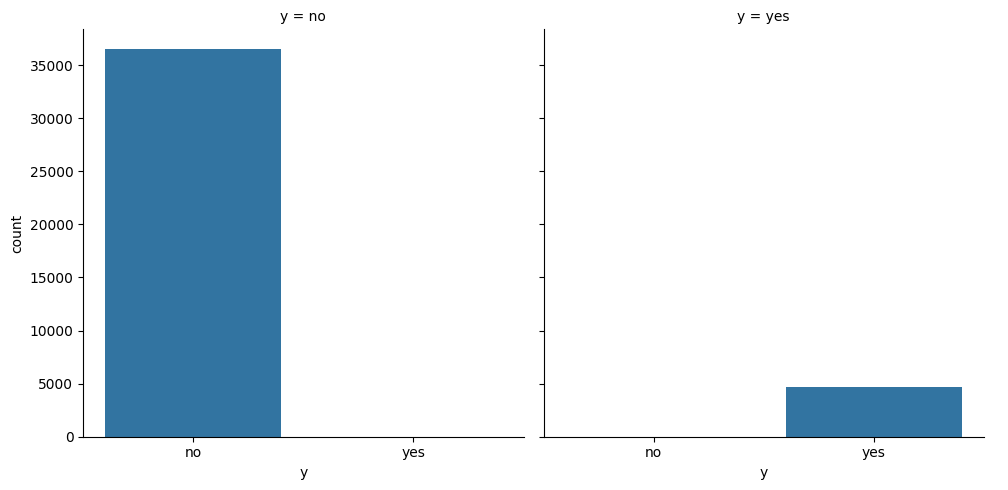

In [11]:
# Relationship between Categorical Variables and Dependent Variable
for categorical_feature in categorical_features:
    sns.catplot(x='y', col=categorical_feature, kind='count', data= df)
plt.show()

In [12]:
for categorical_feature in categorical_features:
    print(df.groupby(['y',categorical_feature]).size())

y    job          
no   admin.           9070
     blue-collar      8616
     entrepreneur     1332
     housemaid         954
     management       2596
     retired          1286
     self-employed    1272
     services         3646
     student           600
     technician       6013
     unemployed        870
     unknown           293
yes  admin.           1352
     blue-collar       638
     entrepreneur      124
     housemaid         106
     management        328
     retired           434
     self-employed     149
     services          323
     student           275
     technician        730
     unemployed        144
     unknown            37
dtype: int64
y    marital 
no   divorced     4136
     married     22396
     single       9948
     unknown        68
yes  divorced      476
     married      2532
     single       1620
     unknown        12
dtype: int64
y    education          
no   basic.4y                3748
     basic.6y                2104
     basic.9y   

In [16]:
# Exploring Numerical Feature
numerical_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O'))]
print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  10


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


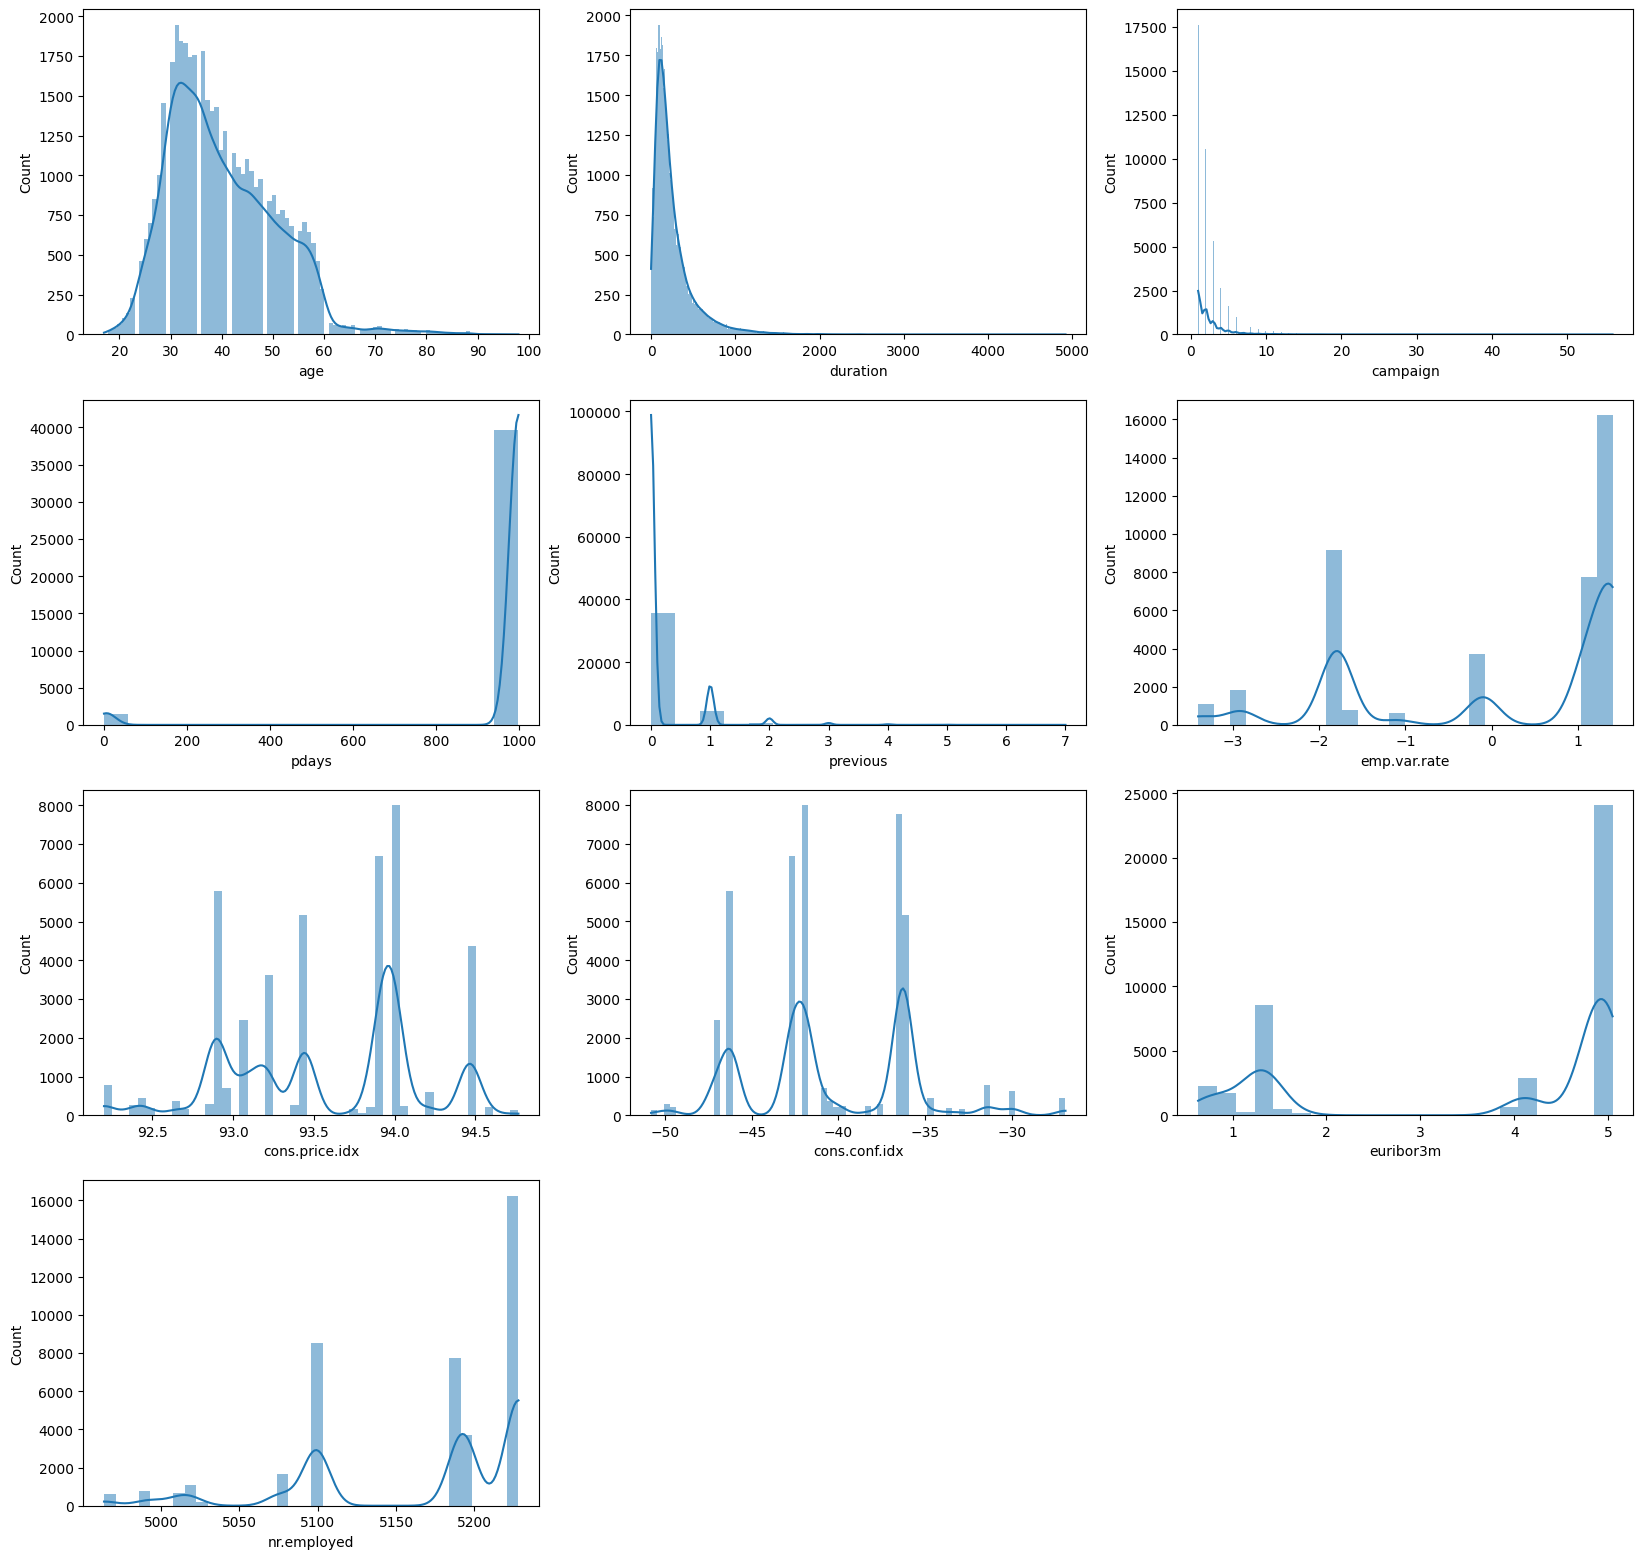

In [14]:
# Plotting the distribution of numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber = 1
for numerical_features in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.histplot(df[numerical_features], edgecolor='none', kde = True)
    plt.xlabel(numerical_features)
    plotnumber +=1
plt.show()

- From the above distributions, some features are distributed normally while others are skewed towards the left or right.

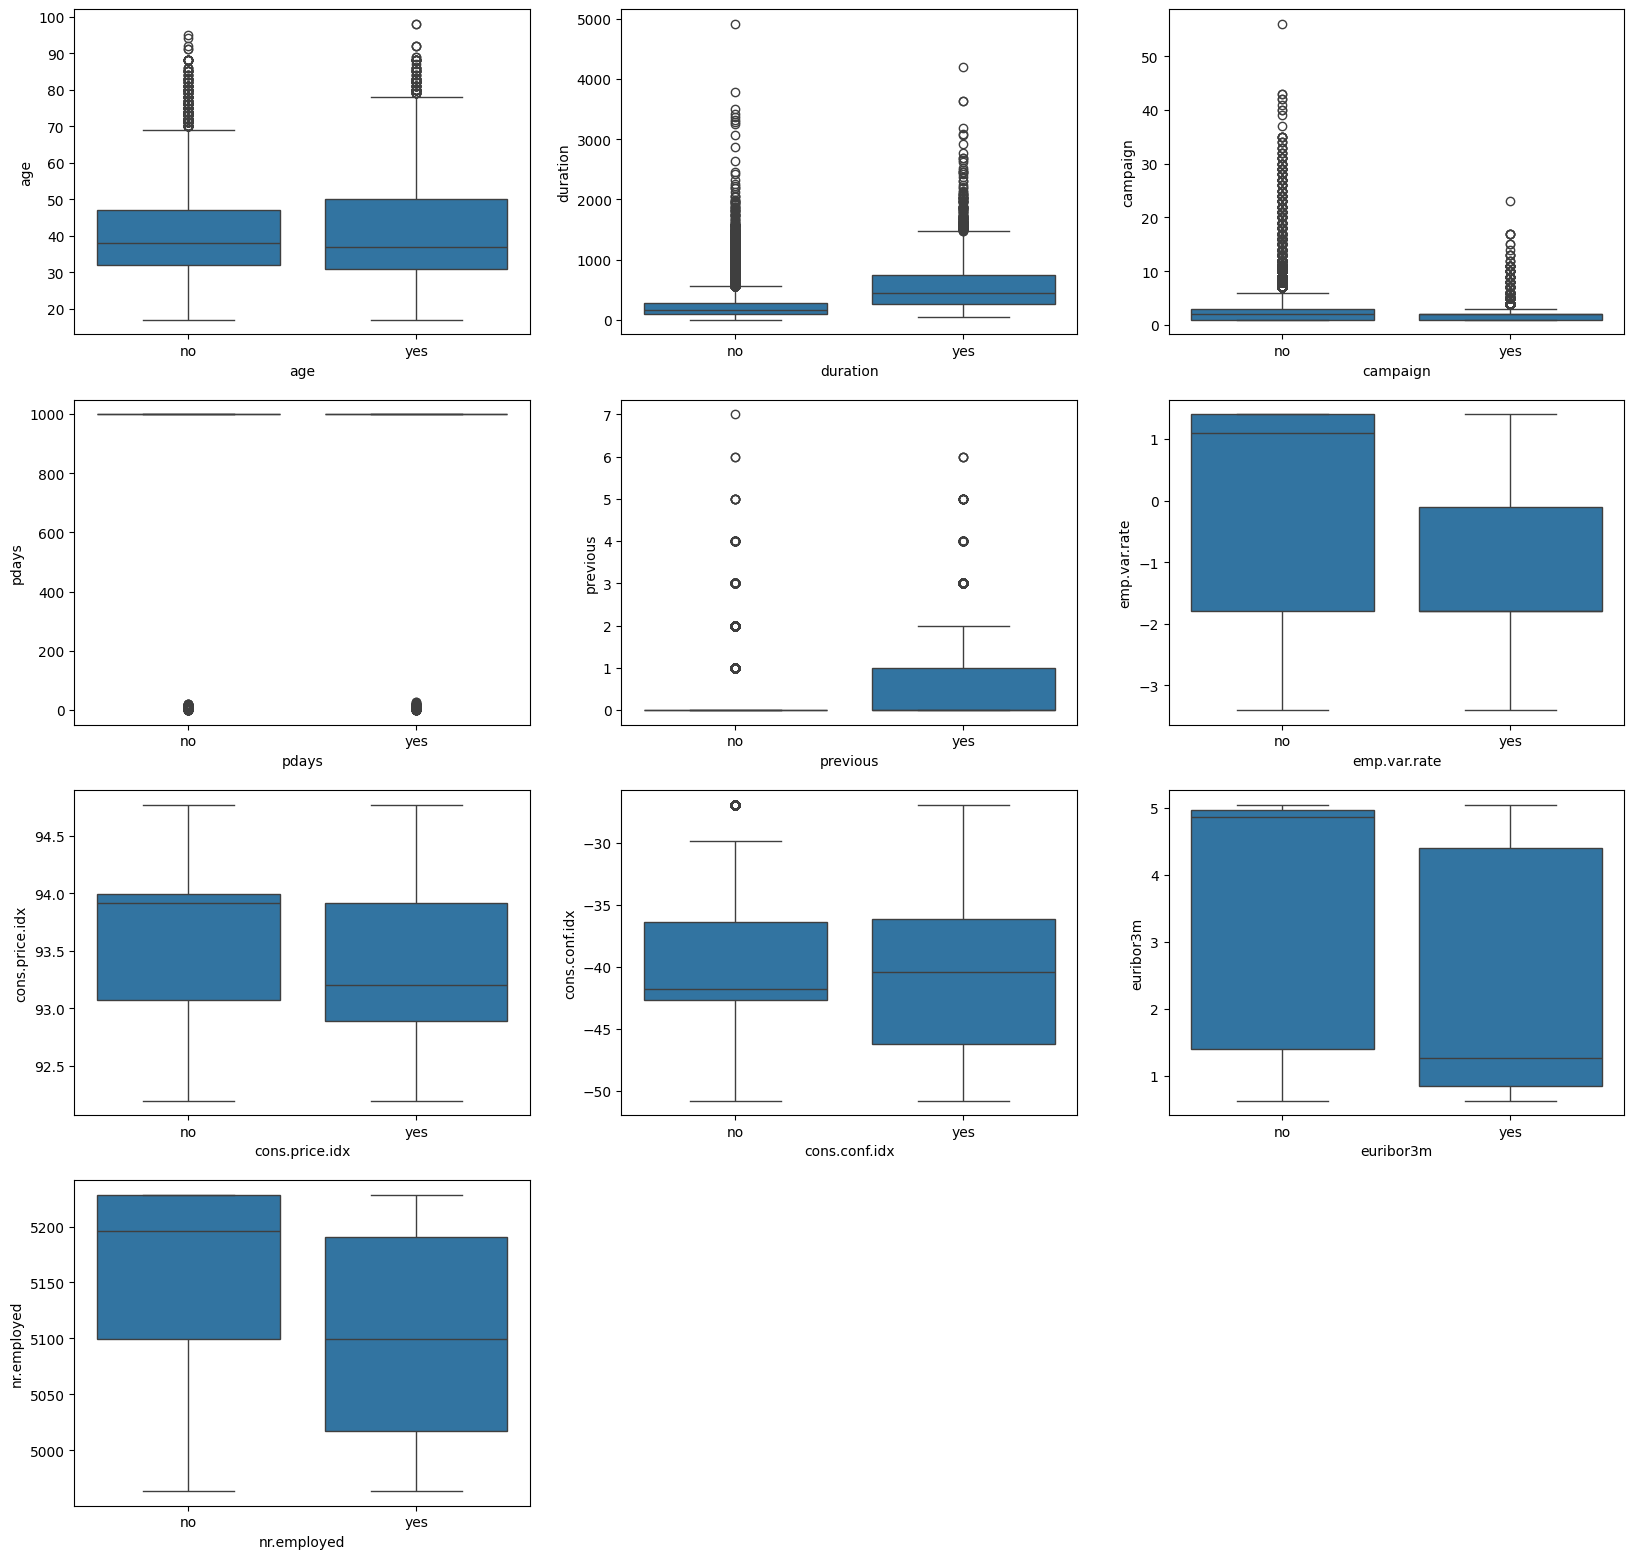

In [17]:
# boxplot to show the target distribution (y) with respect to numerical features
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in numerical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x="y", y= df[feature], data=df)
    plt.xlabel(feature)
    plotnumber +=1
plt.show()

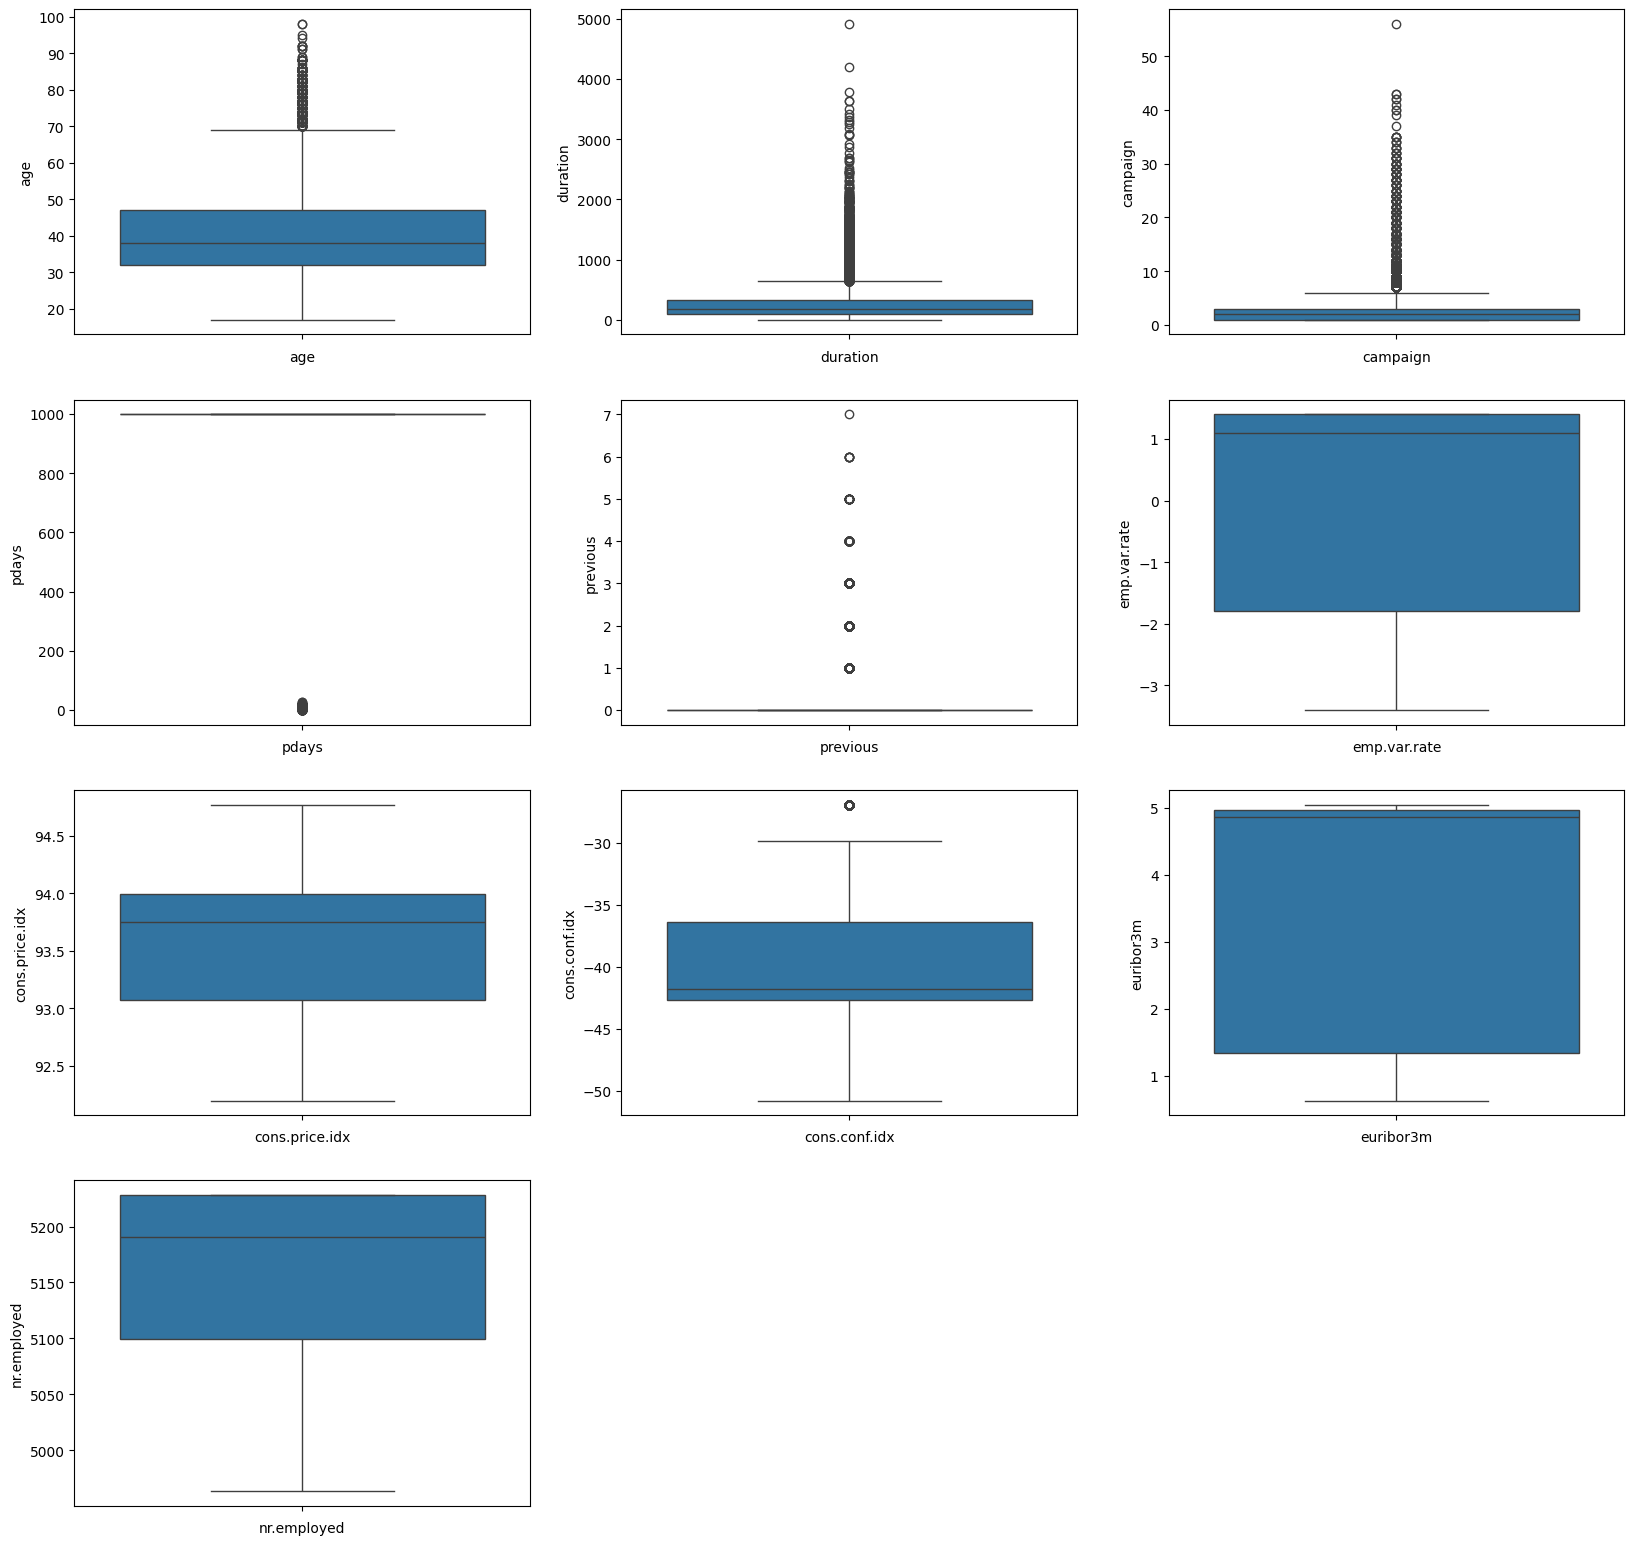

In [18]:
# boxplot of numerical features to find outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber = 1
for numerical_feature in numerical_features:
    ax = plt.subplot(12, 3, plotnumber)
    sns.boxplot(df[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber +=1
plt.show()

- Age, duration, campaign, pday, previous and cons.conf.idx have some outliers

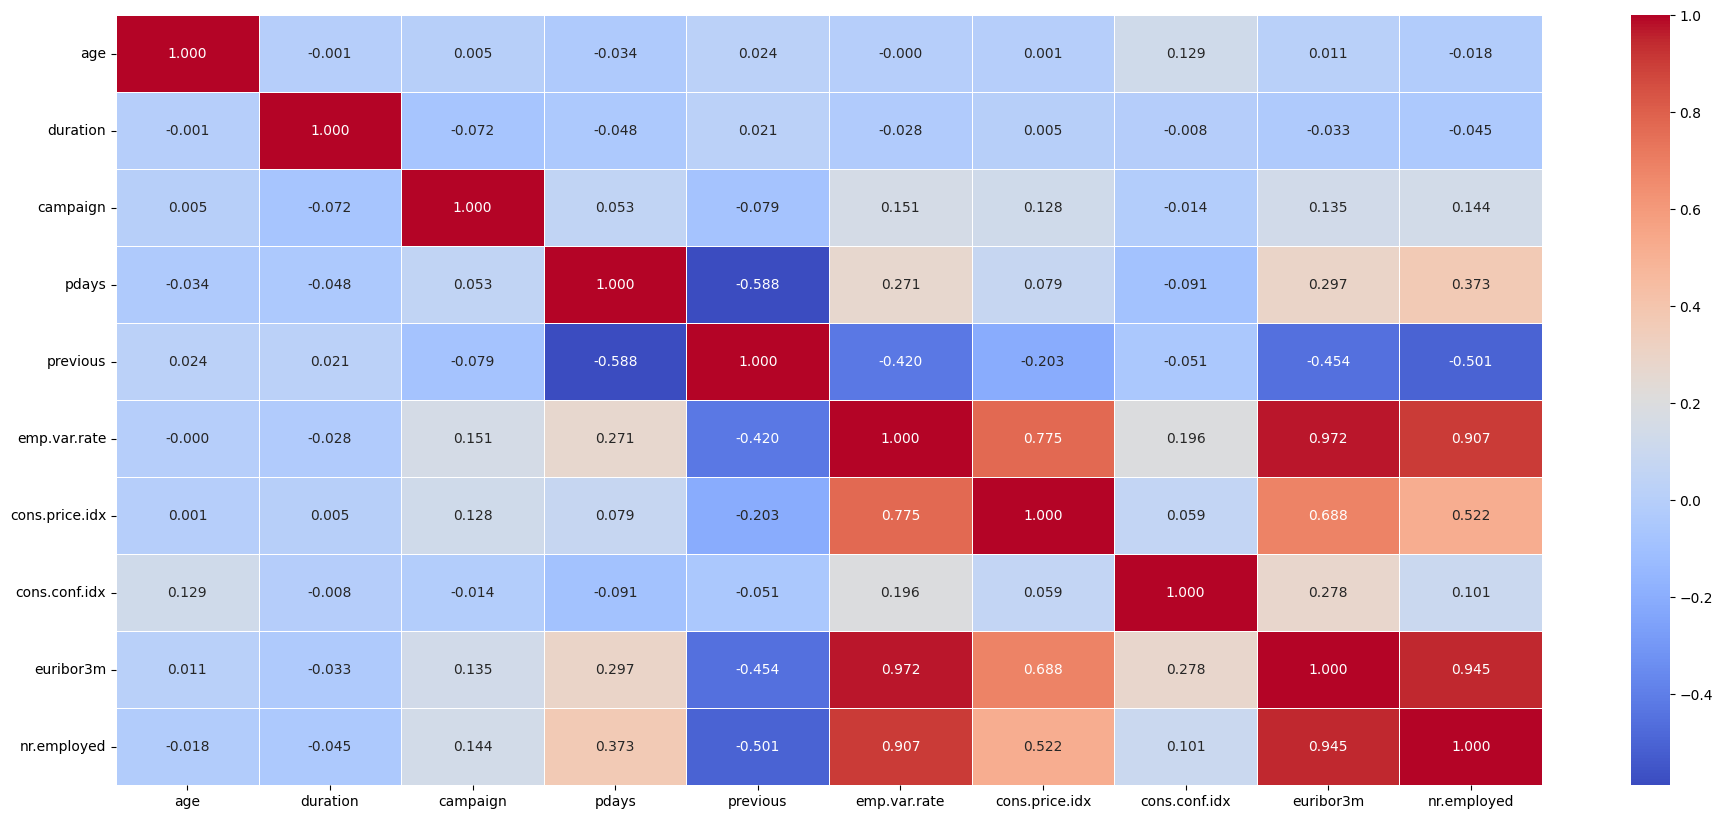

In [19]:
# Correlation Analysis for Numerical Features using Heatmap

# Select only numeric columns
numeric_df = df.select_dtypes(include=['number', 'float64', 'int64'])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot correlation matrix on heatmap
plt.figure(figsize=(23, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.5)
plt.show()

- Some features such as euribor3m and emp.var.rate, emp.var.rate and nr.employed, emp.var.rate and cons.conf.idx, cons.price.idx and euribor3m, cons.price.idx and wmp.var.rate, previous and dpay, er.employed and previous are all heavily correlated with each other.

# Feature Engineering

In [20]:
# categorical features
cat_cols = df.select_dtypes("object").columns
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [21]:
# encode categorical columns
le = LabelEncoder()

df[cat_cols] = df[cat_cols].apply(le.fit_transform)

In [22]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


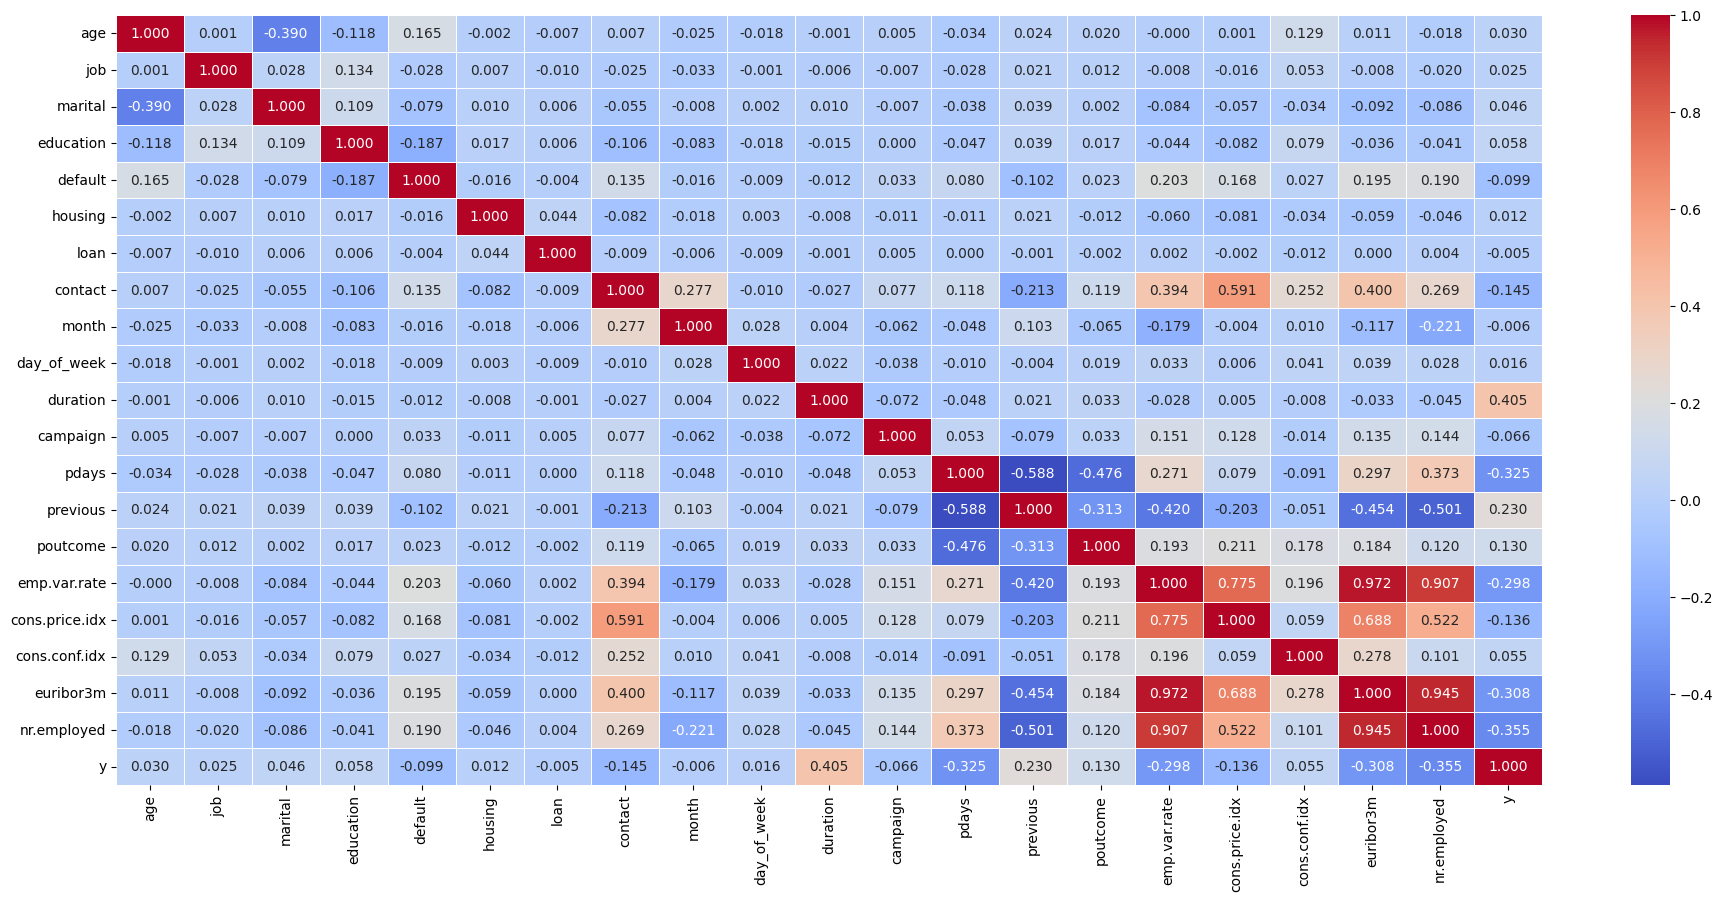

In [23]:
# Correlation Analysis for both Numerical Features and Categorical Features using Heatmap
plt.figure(figsize=(23, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.5)
plt.show()

- y is positively correlated with duration of call and also shows slight positive correlation with previous attempts of call. This implies that clients went ahead with Term deposits subscription after gaining sufficient insights from calls and persuation.

In [24]:
# Separate features (X) and target (y)
X = df.drop(columns = 'y')
y = df['y']

In [25]:
y.value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

- The data is not balance. To get a model free of bias, this must be handle.
- This will be done by **adjusting the class weights** during the model building

# Predictive Model

In [26]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting splits
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")


X_train shape: (32950, 20)
X_test shape: (8238, 20)
y_train shape: (32950,)
y_test shape: (8238,)


In [27]:
# Train a Random Forest model
model = RandomForestClassifier(class_weight='balanced', random_state=42, n_estimators=100)
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

# Prediction and Model Evaluation

In [28]:
# Predict and evaluate
for threshold in [0.1, 0.3, 0.5, 0.7]:
    y_pred = (model.predict_proba(X_test)[:, 1] >= threshold).astype(int)
    print(f"Threshold: {threshold}")
    print(classification_report(y_test, y_pred))

Threshold: 0.1
              precision    recall  f1-score   support

           0       0.99      0.83      0.91      7303
           1       0.42      0.95      0.58       935

    accuracy                           0.85      8238
   macro avg       0.71      0.89      0.74      8238
weighted avg       0.93      0.85      0.87      8238

Threshold: 0.3
              precision    recall  f1-score   support

           0       0.97      0.92      0.94      7303
           1       0.54      0.76      0.63       935

    accuracy                           0.90      8238
   macro avg       0.75      0.84      0.79      8238
weighted avg       0.92      0.90      0.91      8238

Threshold: 0.5
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      7303
           1       0.66      0.48      0.56       935

    accuracy                           0.91      8238
   macro avg       0.80      0.72      0.75      8238
weighted avg       0.90      

### Insights from Model Evaluation:
- At threshold 0.3, the model captures a good portion of positive cases with reasonable precision. *This makes it a balanced choice.*
- At threshold 0.5, the precision improves further but comes at the cost of missing more positive cases (lower recall).
- At threshold 0.7, the precision is very high, but the recall is too low.

In [29]:
# Save the trained model to a file
from joblib import dump
dump(model, 'model.pkl')

['model.pkl']

# Prediction with Different Dataset

Using the **Predictive Model** to predict Term Deposit Subscription for the **bank-additional** dataset

In [30]:
# load bank-additional dataset
new_data = pd.read_csv('data/bank-additional.csv', sep=';')

# select categorical columns from the bank-additional dataset
cat_cols_1 = new_data.select_dtypes("object").columns
cat_cols_1

# encode categorical columns from the bank-additional dataset
le = LabelEncoder()
new_data[cat_cols_1] = new_data[cat_cols_1].apply(le.fit_transform)

# Drop the target column from the bank-additional dataset
new_data = new_data.drop(columns='y', errors='ignore')

# Make predictions for the bank-additional dataset
predictions = model.predict(new_data)
probabilities = model.predict_proba(new_data)[:, 1]

# View results
print("Predictions (class labels):", predictions[:100])
print("Predicted probabilities for the positive class:", probabilities[:100])

Predictions (class labels): [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0]
Predicted probabilities for the positive class: [0.11 0.   0.   0.   0.   0.   0.14 0.   0.   0.   0.   0.   0.   0.
 0.11 0.18 0.01 0.   0.   0.75 0.01 0.63 0.21 0.01 0.02 0.64 0.   0.
 0.   0.   0.12 0.01 0.47 0.   0.01 0.07 0.   0.05 0.   0.02 0.   0.01
 0.04 0.01 0.   0.03 0.14 0.   0.03 0.01 0.09 0.   0.   0.84 0.   0.
 0.   0.   0.   0.82 0.42 0.   0.95 0.08 0.   0.05 0.04 0.   0.33 0.08
 0.05 0.68 0.   0.   0.67 0.   0.   0.06 0.   0.01 0.2  0.01 0.02 0.2
 0.01 0.   0.   0.72 0.59 0.   0.01 0.   0.   0.   0.   0.   0.   0.
 0.01 0.  ]
